<a href="https://colab.research.google.com/github/ecdison/Group9_MachineLearningHC/blob/ellion7/Decision_Logistic_HCTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import zipfile
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

# open zipped dataset
with zipfile.ZipFile("PregnancyData.zip") as z:
   # open the csv file in the dataset
   with z.open("PregnancyData.csv") as f:
     # read the dataset
      df = pd.read_csv(f)

In [2]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


In [3]:
#Heatmap of missing data
sns.heatmap(df.isnull(), cbar=False)

Error in callback <function flush_figures at 0x7f65853e9d40> (for post_execute):


KeyboardInterrupt: ignored

In [4]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Original number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count, how = 'any')
col_mod = mod_df.columns

# Adding new Embryos Transfered column to mod_df from df
mod_df['Embryos Transfered'] = df['Embryos Transfered']

print('New number of columns :', len(col_mod))
print(mod_df.columns)

Original number of columns : 95
New number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infer

In [5]:
# obtaining the shape and size of mod_df after removing and adding columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [6]:
# Dropping more columns
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Partner Sperm Concentration', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Female Factors', axis=1, inplace = True)
mod_df.drop('Causes of Infertility - Partner Sperm Motility', axis=1, inplace = True)
mod_df.drop('Cause of Infertility -  Partner Sperm Immunological factors', axis=1, inplace = True)
mod_df.drop('Specific treatment type', axis=1, inplace = True)

# obtaining the shape and size of mod_df after removing more columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

In [7]:
print(mod_df.nunique())

Patient Age at Treatment                                7
Total Number of Previous IVF cycles                     7
Total number of IVF pregnancies                        12
Total number of live births - conceived through IVF     6
Type of Infertility - Female Primary                    2
Type of Infertility - Female Secondary                  2
Type of Infertility - Male Primary                      2
Type of Infertility - Male Secondary                    2
Type of Infertility -Couple Primary                     2
Type of Infertility -Couple Secondary                   2
Cause  of Infertility - Tubal disease                   2
Cause of Infertility - Ovulatory Disorder               2
Cause of Infertility - Male Factor                      2
Cause of Infertility - Patient Unexplained              2
Cause of Infertility - Endometriosis                    2
Cause of Infertility - Cervical factors                 2
Cause of Infertility -  Partner Sperm Morphology        2
Stimulation us

In [8]:
# Show each unique value in every column
for col in mod_df:
    print(col)
    print(mod_df[col].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999']
Total Number of Previous IVF cycles
['2' '3' '0' '5' '4' '1' '>=5']
Total number of IVF pregnancies
[0 1 2 4 3 5 '0' '1' '2' '3' '4' '>=5']
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'not assigned' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number

In [9]:
# Fixing outliers and errors in data
mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
mod_df.drop(mod_df.index[mod_df['Sperm From'] == 'not assigned'], inplace = True)
mod_df['Patient Age at Treatment'].replace({'40-42': 41, '45-50': 47.5, '35-37': 36, '18 - 34': 26, '43-44': 43.5, '38-39': 38.5}, inplace=True)
mod_df['Total Number of Previous IVF cycles'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Total number of IVF pregnancies'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
#mod_df['Sperm From'].replace({'Partner': 0, 'Donor': 1, 'Partner & Donor': 2}, inplace=True)
mod_df.fillna(value=mod_df['Embryos Transfered'].mean().astype(float), inplace=True)

In [10]:
SpermFromPartner = [] 
for s in list(mod_df['Sperm From']):
    if 'Partner' in s:
        SpermFromPartner.append(1)
    else:
        SpermFromPartner.append(0)
SpermFromDonor = [] 
for s in list(mod_df['Sperm From']):
    if 'Donor' in s:
        SpermFromDonor.append(1)
    else:
        SpermFromDonor.append(0)
        
mod_df.insert(len(mod_df.columns), column = "Sperm From Partner", value = SpermFromPartner)
mod_df.insert(len(mod_df.columns), column = "Sperm From Donor", value = SpermFromDonor)
mod_df.drop('Sperm From', axis=1, inplace = True)

In [11]:
# Checking each unique value in every column
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 2 4 3 5 6]
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Number of Live Births
[1 0 2 3 4]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1.         2.         0.         3.         1.16425844]
Sperm

In [12]:
# obtaining the shape and size of mod_df after fixing outliers and errors in data
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (156025, 23)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Number of Live Births', 'Number of foetal sacs with fetal pulsation',
       'Embryos Transfered', 'Sperm From Partner', 'Sperm From Donor'],
      dtype='obj

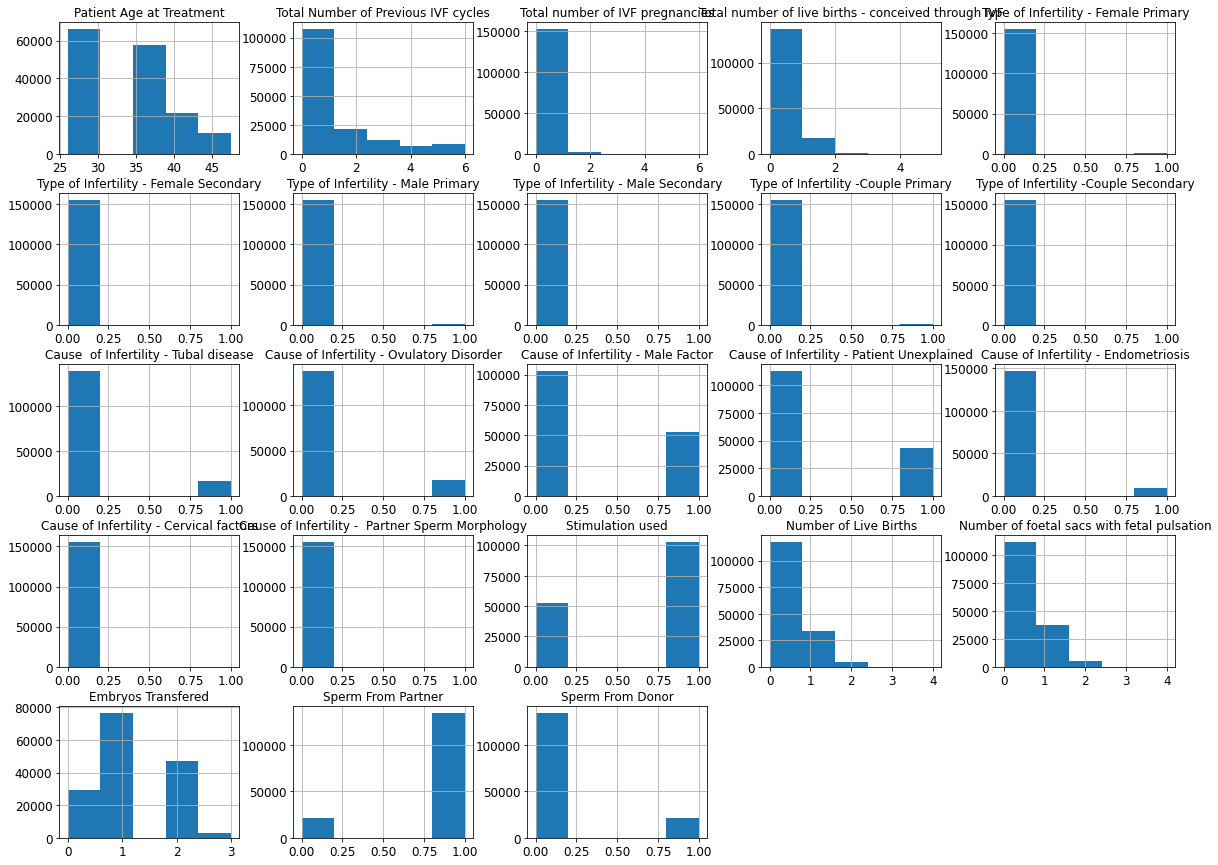

In [13]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(20,15))
plt.show()

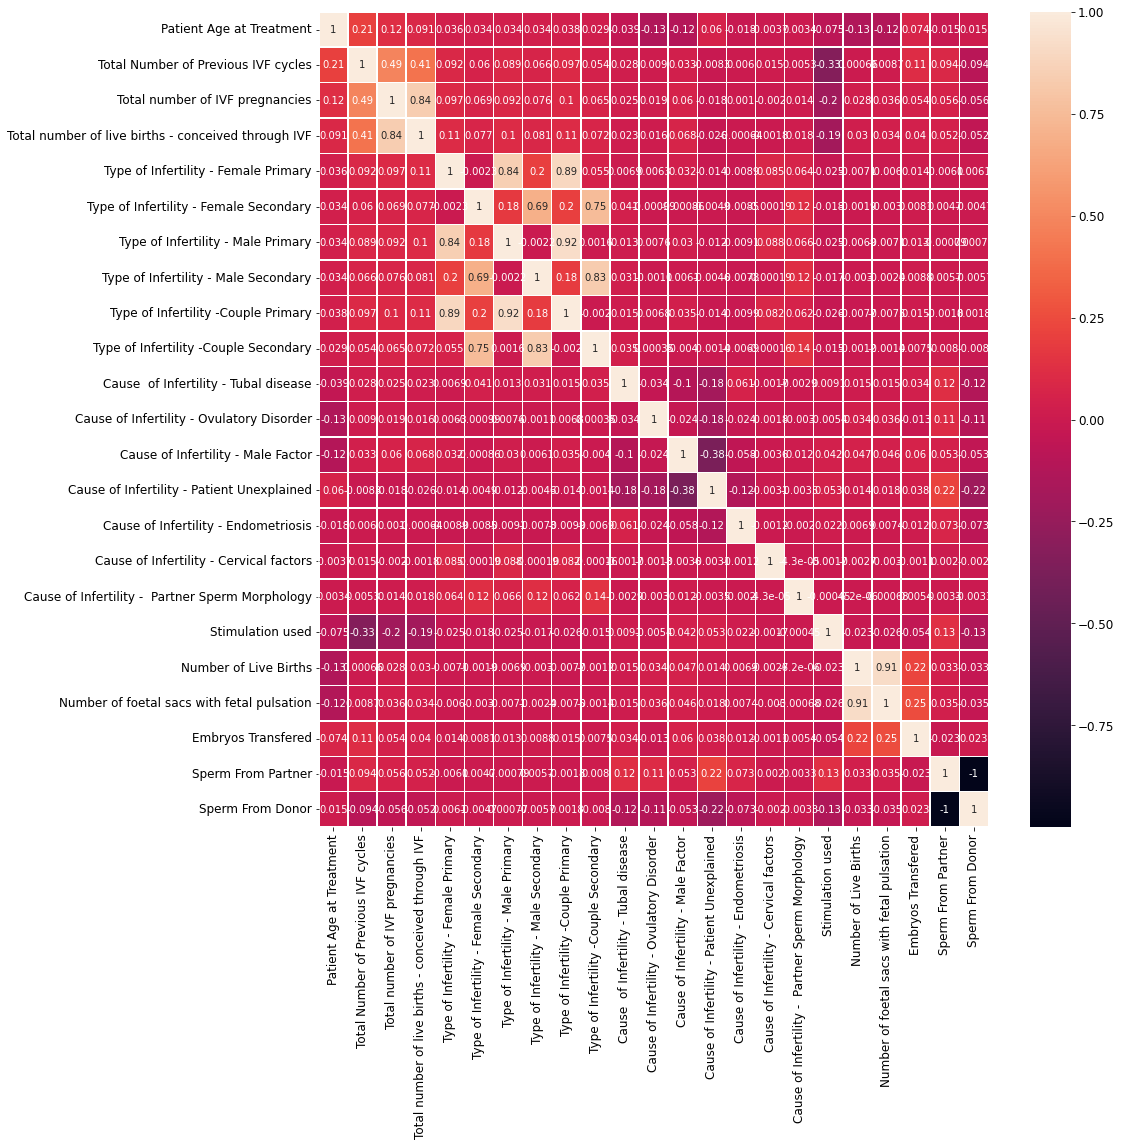

In [14]:
fig, ax = plt.subplots(figsize=(15,15))  # Sample figsize in inches
sns.heatmap(mod_df.corr(), annot=True, linewidths=.5, ax=ax)

In [15]:
# Add a new column named 'LiveBirth'
mod_df['LiveBirth'] = [1 if x >= 1 else 0 for x in mod_df['Total number of live births - conceived through IVF']]
# mod_df['Pregnant'] = [1 if x >= 1 else 0 for x in mod_df['Total number of IVF pregnancies']]

# Print number of 0s and 1s in target column
print('Live Briths:')
print(mod_df['LiveBirth'].value_counts())
# print('Preganancies:')
# print(mod_df['Pregnant'].value_counts())

Live Briths:
0    137162
1     18863
Name: LiveBirth, dtype: int64


In [16]:
#target_columns 
Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth']
#Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 'Pregnant']
y = ['LiveBirth']
#feature_columns 
x = [c for c in mod_df.columns if c not in Y]

print(y)
print(x)

#target_columns 
remove = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 
          'Total number of IVF pregnancies']
target = ['Total number of IVF pregnancies']

# remove = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth', 
#           'Total number of IVF pregnancies', 'Pregnant']
# target = ['Pregnant']
#feature_columns 
feature = [col for col in mod_df.columns if col not in remove]

print(target)
print(feature)

['LiveBirth']
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered', 'Sperm From Partner', 'Sperm From Donor']
['Total number of IVF pregnancies']
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility -

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mod_df[x], mod_df[y], test_size=0.2, random_state=42, stratify = mod_df[y])

In [49]:
X_train.to_csv('train_binary_x.csv', index=False)
y_train.to_csv('train_binary_y.csv', index=False)
X_test.to_csv('test_binary_x.csv', index=False)
y_test.to_csv('test_binary_y.csv', index=False)

In [21]:
mod_df.drop(mod_df.index[mod_df['Total number of IVF pregnancies'] == 6], inplace = True)

In [22]:
X_tn, X_tt, y_tn, y_tt = train_test_split(mod_df[feature], mod_df[target], test_size=0.2, random_state=42, stratify = mod_df[target])

In [23]:
print(y_tn.value_counts())

Total number of IVF pregnancies
0                                  105022
1                                   17325
2                                    2131
3                                     291
4                                      45
5                                       5
dtype: int64


In [24]:
# Using smote to resample the target data
smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [25]:
# Realized theres no point in using smote
# smt2 = SMOTE(random_state = 100, sampling_strategy = 'auto', k_neighbors = 4)
# X_train_smt2, y_train_smt2 = smt2.fit_resample(X_tn, y_tn)

In [26]:
print(y_train_smt.value_counts())

LiveBirth
0            109730
1            109730
dtype: int64


In [28]:
dt = DecisionTreeClassifier(random_state=42)

In [29]:
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_tn, y_tn)

DecisionTreeClassifier(random_state=42)

In [30]:
dt.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = dt.predict(X_test)

In [32]:
y_pred2 = dt2.predict(X_tt)

In [33]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[26349  1083]
 [  277  3496]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     27432
           1       0.76      0.93      0.84      3773

    accuracy                           0.96     31205
   macro avg       0.88      0.94      0.91     31205
weighted avg       0.96      0.96      0.96     31205



In [34]:
print('Confusion Matrix:')
print(confusion_matrix(y_tt, y_pred2))
print('Classification Report:')
print(classification_report(y_tt, y_pred2))

Confusion Matrix:
[[25504   714    29     9     0     0]
 [ 3604   662    58     7     0     0]
 [  335   181    14     3     0     0]
 [   40    23     7     3     0     0]
 [    7     4     0     0     0     0]
 [    0     1     0     0     0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92     26256
           1       0.42      0.15      0.22      4331
           2       0.13      0.03      0.04       533
           3       0.14      0.04      0.06        73
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1

    accuracy                           0.84     31205
   macro avg       0.26      0.20      0.21     31205
weighted avg       0.79      0.84      0.80     31205



In [35]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(25,25))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

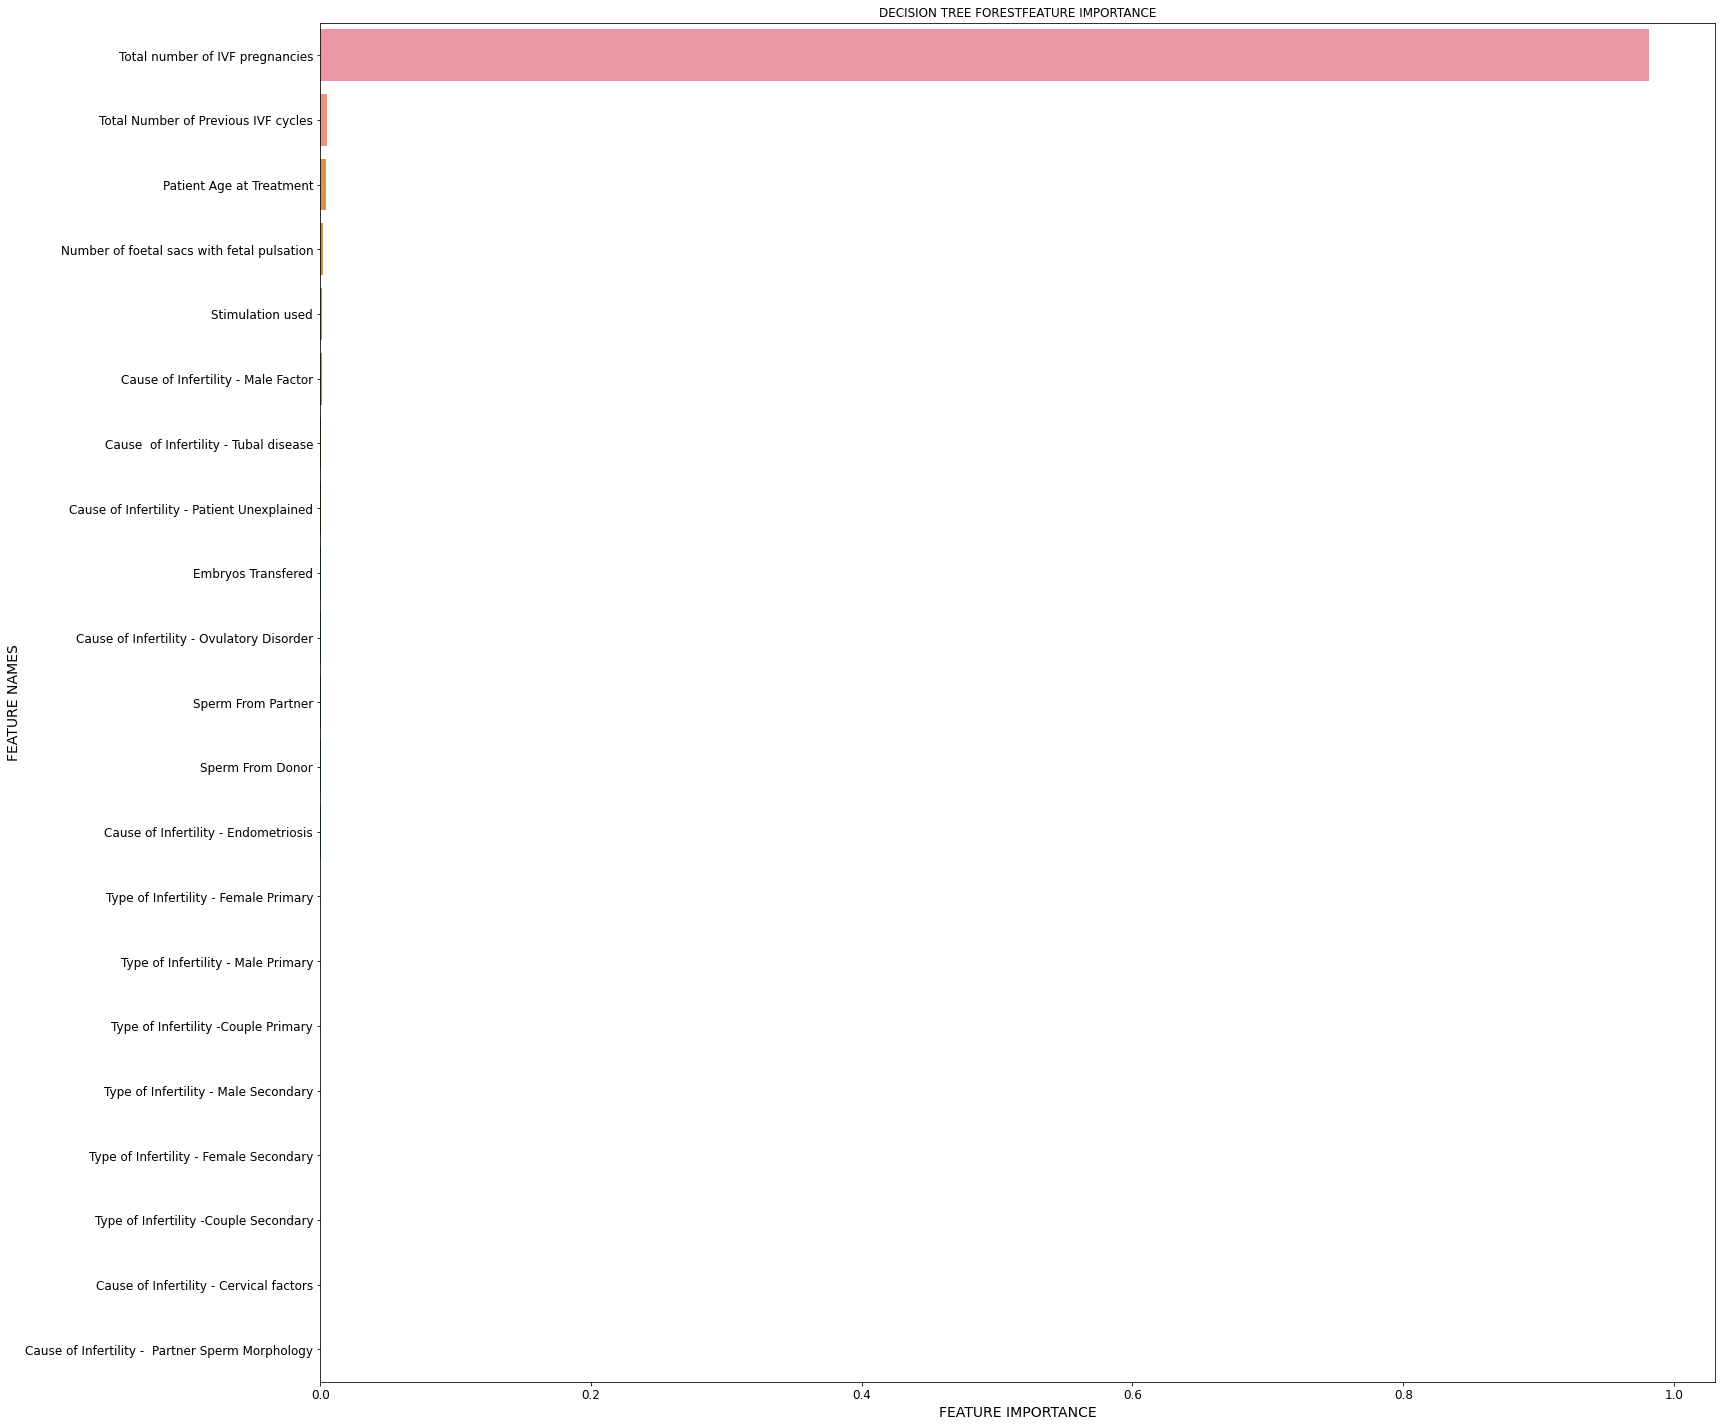

In [36]:
plot_feature_importance(dt.feature_importances_, X_train_smt.columns, 'DECISION TREE FOREST')

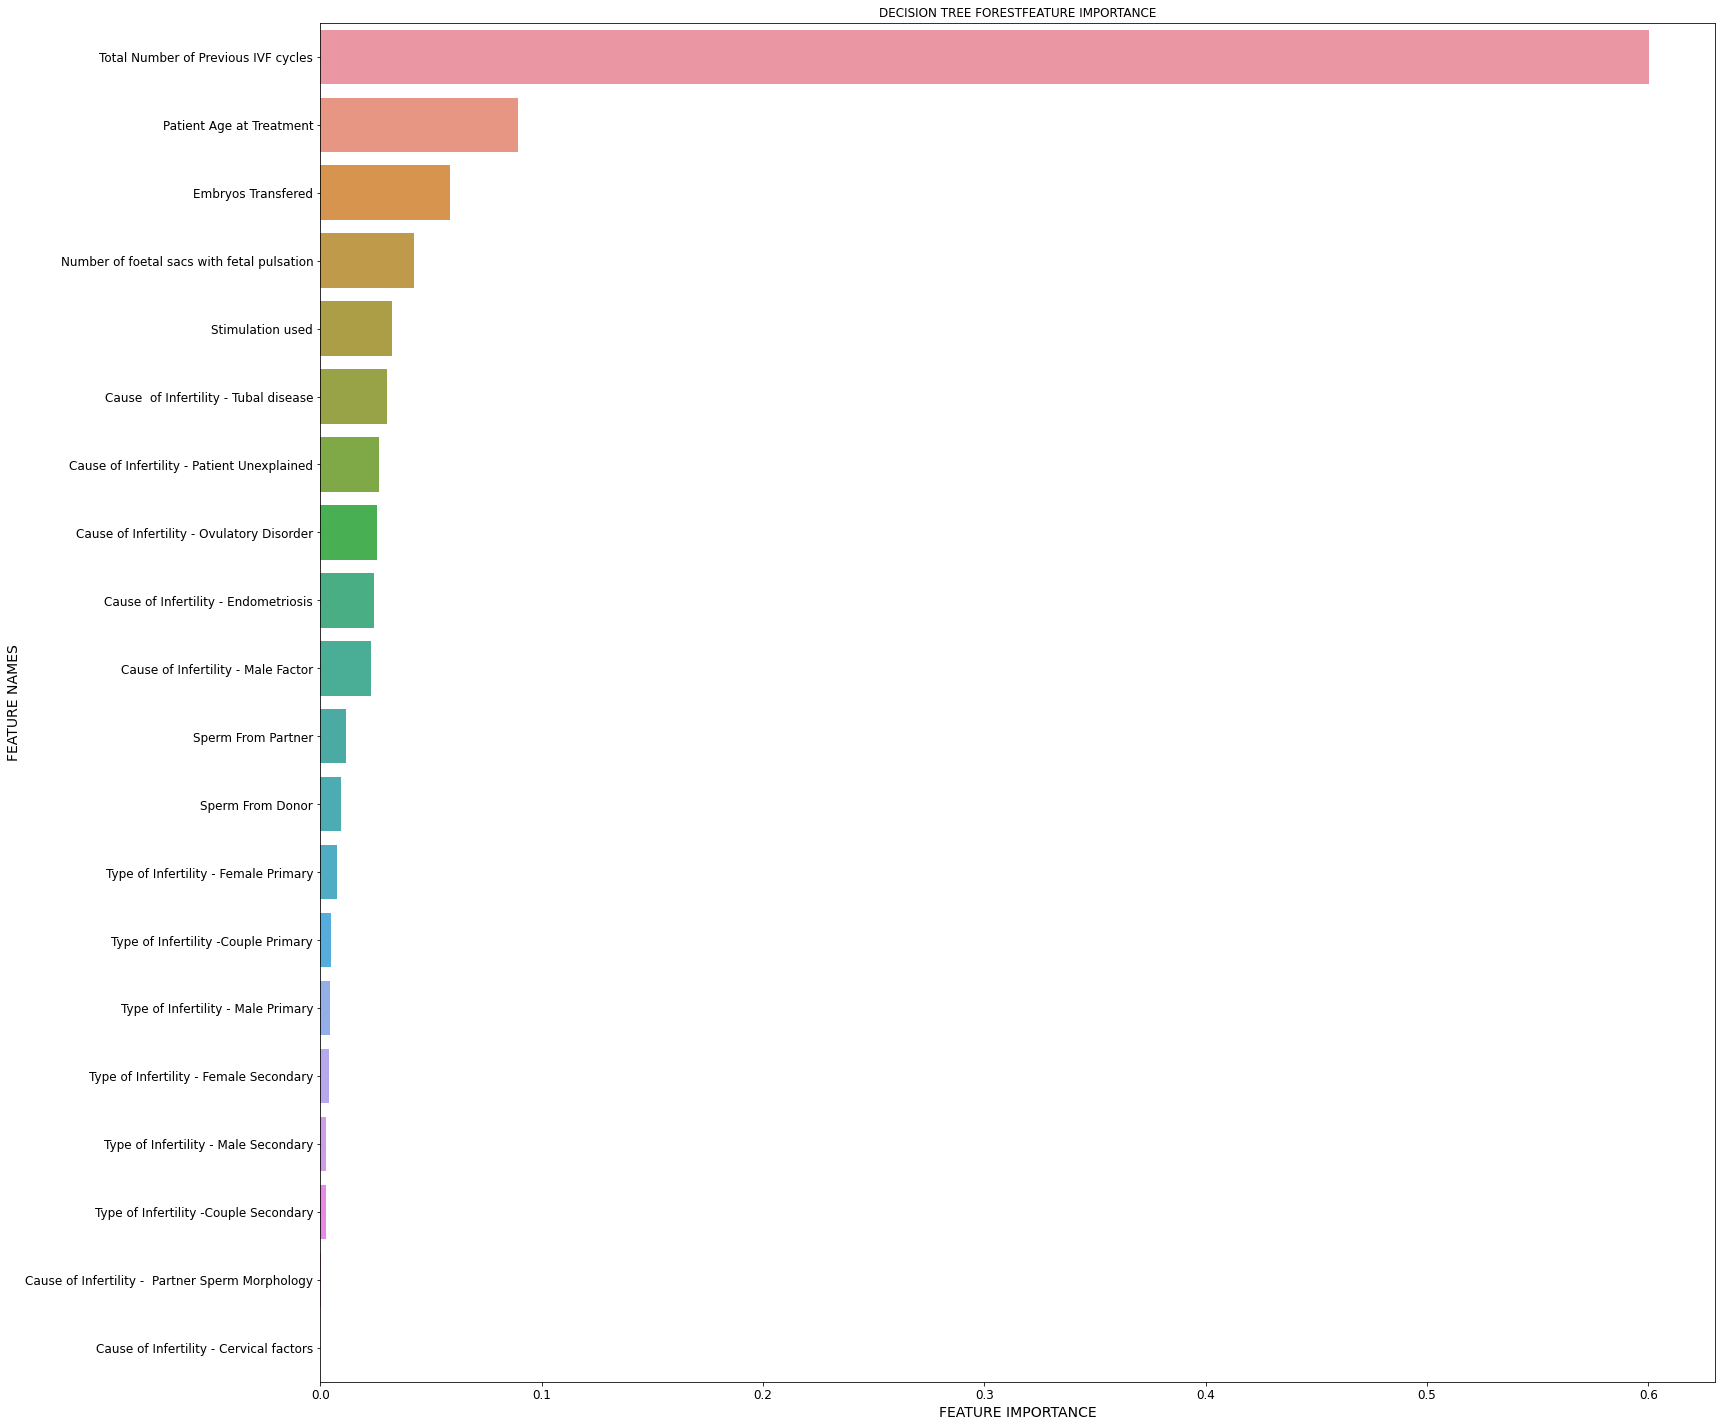

In [37]:
plot_feature_importance(dt2.feature_importances_, X_tn.columns, 'DECISION TREE FOREST')

In [41]:
pca = decomposition.PCA()
smt = SMOTE(random_state=42, sampling_strategy = 1.0)
log = LogisticRegression()
pipeline = Pipeline([('smt', smt), ('pca', pca), ('log', log)])
pipeline.fit(X_train, y_train) 
y_pred3 = pipeline.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred3))
print('Classification Report:')
print(classification_report(y_test, y_pred3))

Confusion Matrix:
[[26245  1187]
 [    0  3773]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27432
           1       0.76      1.00      0.86      3773

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205



In [42]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20, 50, 70, 100, 70, 50, 20),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='sgd',
       tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [43]:
MLP.fit(X_train_smt, y_train_smt)

Iteration 1, loss = 0.36769197
Validation score: 0.978174
Iteration 2, loss = 0.14060211
Validation score: 0.978720
Iteration 3, loss = 0.13779948
Validation score: 0.978493
Iteration 4, loss = 0.13681644
Validation score: 0.975485
Iteration 5, loss = 0.13808764
Validation score: 0.978675
Iteration 6, loss = 0.13556658
Validation score: 0.978720
Iteration 7, loss = 0.13517844
Validation score: 0.978720
Iteration 8, loss = 0.13468768
Validation score: 0.978675
Iteration 9, loss = 0.13448085
Validation score: 0.978720
Iteration 10, loss = 0.15509352
Validation score: 0.666044
Iteration 11, loss = 0.28445594
Validation score: 0.978402
Iteration 12, loss = 0.13793450
Validation score: 0.978310
Iteration 13, loss = 0.13570474
Validation score: 0.978720
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 14, loss = 0.13425737
Validation score: 0.978584
Iteration 15, loss = 0.13408819
Validation score: 0.978584
Iterati

MLPClassifier(alpha=0.05, early_stopping=True,
              hidden_layer_sizes=(20, 50, 70, 100, 70, 50, 20),
              learning_rate='adaptive', max_iter=500, solver='sgd',
              verbose=True)

In [44]:
y_pred3 = MLP.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27432
           1       0.76      1.00      0.86      3773

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205



In [45]:
MLP.fit(X_tn, y_tn)

Iteration 1, loss = 0.59585504
Validation score: 0.837927
Iteration 2, loss = 0.46035522
Validation score: 0.838407
Iteration 3, loss = 0.43498881
Validation score: 0.837686
Iteration 4, loss = 0.42575016
Validation score: 0.837446
Iteration 5, loss = 0.42113042
Validation score: 0.838007
Iteration 6, loss = 0.41845914
Validation score: 0.839128
Iteration 7, loss = 0.41676255
Validation score: 0.838087
Iteration 8, loss = 0.41503669
Validation score: 0.837526
Iteration 9, loss = 0.41448063
Validation score: 0.838968
Iteration 10, loss = 0.41334233
Validation score: 0.839289
Iteration 11, loss = 0.41279639
Validation score: 0.839289
Iteration 12, loss = 0.41180345
Validation score: 0.838968
Iteration 13, loss = 0.41147645
Validation score: 0.838648
Iteration 14, loss = 0.41102454
Validation score: 0.838648
Iteration 15, loss = 0.41071755
Validation score: 0.839849
Iteration 16, loss = 0.41028628
Validation score: 0.838808
Iteration 17, loss = 0.40996072
Validation score: 0.839929
Iterat

MLPClassifier(alpha=0.05, early_stopping=True,
              hidden_layer_sizes=(20, 50, 70, 100, 70, 50, 20),
              learning_rate='adaptive', max_iter=500, solver='sgd',
              verbose=True)

In [46]:
y_pred4 = MLP.predict(X_tt)
print(classification_report(y_tt, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     26256
           1       0.47      0.09      0.16      4331
           2       0.00      0.00      0.00       533
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1

    accuracy                           0.85     31205
   macro avg       0.22      0.18      0.18     31205
weighted avg       0.79      0.85      0.79     31205

